In [1]:
import gym
from gym import wrappers
import numpy as np
from collections import deque

env = gym.make('FrozenLake-v0')
# env = wrappers.Monitor(env, '/tmp/frozen-lake', force=True)

print env.action_space
print env.observation_space

on = env.observation_space.n
an = env.action_space.n

[2017-03-27 23:05:02,066] Making new env: FrozenLake-v0


Discrete(4)
Discrete(16)


In [2]:
# Parameters.
episodes = 3000
gamma = 0.99
alpha = 0.1
eps = 0.8
eps_decay = 0.995

# Q function.
Q = np.ones([on, an])

env.render();


SFFF
FHFH
FFFH
HFFG


In [3]:
history = deque(maxlen=200)
r_history = deque(maxlen=100)
means = []
stds = []

for ep in range(episodes + 1):
    obs = env.reset()
    done = False
    while not done:
        if np.random.uniform() <= eps:
            act = env.action_space.sample()
        else:
            act = np.argmax(Q[obs])
        obs_new, r, done, _ = env.step(act)
        history.append([obs, act, obs_new, r])
        obs = obs_new
    
    r_history.append(r)
    means.append(np.mean(list(r_history)))
    stds.append(np.std((r_history)))
    # Ignore the last observation.
    obs, act, obs_new, r = history.pop()
    Q[obs, act] = (1.0 - alpha) * Q[obs, act] + alpha * r
    while len(history):
        obs, act, obs_new, r = history.pop()
        Q[obs, act] = (1.0 - alpha) * Q[obs, act] + alpha * (r + gamma * np.max(Q[obs_new]))
    eps = eps * eps_decay
print "Finished!"

Finished!


In [4]:
obs = env.reset()
env.render()
done = False
while not done:
    act = np.argmax(Q[obs])
    obs_new, r, done, _ = env.step(act)
    obs = obs_new
    env.render()


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
F

In [5]:
env.close()
# gym.upload('/tmp/frozen-lake', api_key='sk_1ocsn6B6SNqZK13Kxezg')

In [6]:
# Visualization
np.set_printoptions(precision=3, suppress=True)

def disp_V(Q):
    V = np.max(Q, axis=1)
    print np.reshape(V, [4, 4])

def disp_policy(Q):
    mu = np.argmax(Q, axis=1)
    mu = np.reshape(mu, [4, 4]).astype('str')
    mu[mu == '0'] = 'L'
    mu[mu == '1'] = 'D'
    mu[mu == '2'] = 'R'
    mu[mu == '3'] = 'U'
    print mu

env.reset()  
env.render()
print "Q function:"
print Q

print "Value function:"
disp_V(Q)

print "Policy:"
disp_policy(Q)


SFFF
FHFH
FFFH
HFFG
Q function:
[[ 0.48   0.413  0.414  0.409]
 [ 0.37   0.363  0.357  0.471]
 [ 0.349  0.359  0.333  0.441]
 [ 0.331  0.339  0.356  0.435]
 [ 0.487  0.301  0.376  0.275]
 [ 1.     1.     1.     1.   ]
 [ 0.21   0.193  0.348  0.205]
 [ 1.     1.     1.     1.   ]
 [ 0.345  0.435  0.435  0.539]
 [ 0.467  0.631  0.364  0.426]
 [ 0.65   0.406  0.422  0.32 ]
 [ 1.     1.     1.     1.   ]
 [ 1.     1.     1.     1.   ]
 [ 0.501  0.53   0.694  0.515]
 [ 0.664  0.87   0.647  0.662]
 [ 1.     1.     1.     1.   ]]
Value function:
[[ 0.48   0.471  0.441  0.435]
 [ 0.487  1.     0.348  1.   ]
 [ 0.539  0.631  0.65   1.   ]
 [ 1.     0.694  0.87   1.   ]]
Policy:
[['L' 'U' 'U' 'U']
 ['L' 'L' 'R' 'L']
 ['U' 'D' 'L' 'L']
 ['L' 'R' 'D' 'L']]


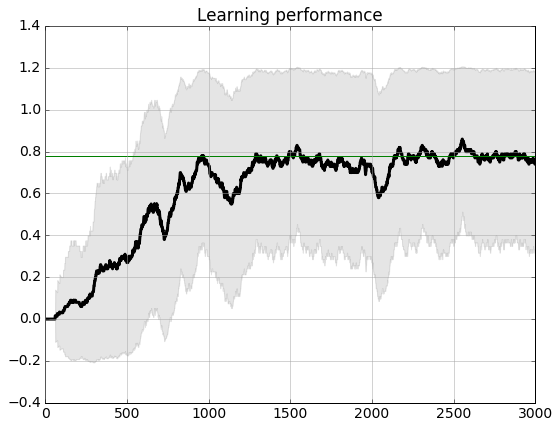

In [7]:
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['font.size'] = 14
plt.rcParams['image.cmap'] = 'gray'

x = range(episodes + 1)
means = np.array(means)
stds = np.array(stds)

# Plot.
plt.plot(x, means, color='k', linewidth=3)
plt.plot((0, episodes), (0.78, 0.78), 'g')
plt.fill_between(x, means - stds, means + stds, alpha=0.1, color='k')
plt.tight_layout()
plt.grid(b=True, which='both', color='0.65',linestyle='-')

plt.title("Learning performance");